In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-application-and-transaction-fraud-detection/loan_applications.csv
/kaggle/input/loan-application-and-transaction-fraud-detection/transactions.csv


# **✅ Table of Contents**
-----------------------
✅ **Import libraries.**   
✅ **Data Import & EDA.**   
✅ **Data Trasnforamtion.**   
✅ **Data Visualization.**   
✅ **ML Modeling and Prediction.**   

# **1. Import Libraries**

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **2. Data Import & EDA**

In [90]:
df_loan = pd.read_csv('/kaggle/input/loan-application-and-transaction-fraud-detection/loan_applications.csv')
df_tran = pd.read_csv('/kaggle/input/loan-application-and-transaction-fraud-detection/transactions.csv')

## **Data Description**
---------------------
**This dataset is designed to provide a rich source of information for tackling financial fraud.**    
**It comprises two interconnected CSV files: loan_applications.csv and transactions.csv.**


**loan_applications.csv** offers a detailed view into individual loan applications, capturing demographic information, financial standing, loan specifics, and the crucial fraud_flag indicating fraudulent applications. This dataset is invaluable for understanding the characteristics that might lead to fraudulent loan requests.

**transactions.csv** provides a granular look at customer transaction history, including transaction types, amounts, merchant details, and location. Crucially, it also includes a fraud_flag for individual transactions, enabling the analysis of suspicious spending patterns.

## **Summary**

In [91]:
df_loan.info(), print('-'*50), df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

(None, None, None)

In [92]:
data = pd.merge(df_loan,df_tran,on='customer_id',how='inner')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125281 entries, 0 to 125280
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   application_id                     125281 non-null  object 
 1   customer_id                        125281 non-null  object 
 2   application_date                   125281 non-null  object 
 3   loan_type                          125281 non-null  object 
 4   loan_amount_requested              125281 non-null  float64
 5   loan_tenure_months                 125281 non-null  int64  
 6   interest_rate_offered              125281 non-null  float64
 7   purpose_of_loan                    125281 non-null  object 
 8   employment_status                  125281 non-null  object 
 9   monthly_income                     125281 non-null  float64
 10  cibil_score                        125281 non-null  int64  
 11  existing_emis_monthly              1252

In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount_requested,125281.0,514356.702134,276407.743138,100000.0,300000.00,503000.00,703000.00,1.618000e+06
loan_tenure_months,125281.0,121.402958,121.458685,12.0,24.00,60.00,240.00,3.600000e+02
interest_rate_offered,125281.0,10.527234,1.924359,7.0,9.16,10.51,11.84,1.962000e+01
monthly_income,125281.0,50766.492924,23787.872980,10000.0,33600.00,50300.00,67200.00,1.486000e+05
cibil_score,125281.0,699.052147,49.739549,476.0,665.00,699.00,733.00,8.870000e+02
existing_emis_monthly,125281.0,3071.302911,1893.028794,0.0,1700.00,3000.00,4400.00,1.140000e+04
debt_to_income_ratio,125281.0,8.591269,9.556506,0.0,3.12,5.96,10.34,1.020000e+02
applicant_age,125281.0,43.111717,13.024996,21.0,32.00,43.00,54.00,6.500000e+01
number_of_dependents,125281.0,2.008780,1.403768,0.0,1.00,2.00,3.00,4.000000e+00
fraud_flag_x,125281.0,0.020833,0.142826,0.0,0.00,0.00,0.00,1.000000e+00


## **Missing Value & Duplicate Value Check**

In [95]:
pd.DataFrame(data.isna().sum().reset_index(name='Na'))

,index,Na
0,application_id,0
1,customer_id,0
2,application_date,0
3,loan_type,0
4,loan_amount_requested,0
5,loan_tenure_months,0
6,interest_rate_offered,0
7,purpose_of_loan,0
8,employment_status,0
9,monthly_income,0


In [96]:
data.duplicated().sum()

0

In [97]:
data.head(2)

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag_y
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,Samra Group,"Ratlam, West Bengal",0.0,0,ATM,186.235.7.252,Success,OFOB90092825868410,Payment for Online Shopping,0
1,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,Kumar LLC,"Burhanpur, Telangana",16665.0,0,POS,198.121.163.126,Success,Self,Payment for Utilities,0


# **2. Data Transformation**

In [98]:
data = data.drop(columns = ['application_id','customer_id','transaction_id','fraud_type'])

In [99]:
data['application_date'] = pd.to_datetime(data['application_date'])
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

In [100]:
# Data Check
data.info()
data.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125281 entries, 0 to 125280
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   application_date                   125281 non-null  datetime64[ns]
 1   loan_type                          125281 non-null  object        
 2   loan_amount_requested              125281 non-null  float64       
 3   loan_tenure_months                 125281 non-null  int64         
 4   interest_rate_offered              125281 non-null  float64       
 5   purpose_of_loan                    125281 non-null  object        
 6   employment_status                  125281 non-null  object        
 7   monthly_income                     125281 non-null  float64       
 8   cibil_score                        125281 non-null  int64         
 9   existing_emis_monthly              125281 non-null  float64       
 10  debt_to_income_ratio

,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,...,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag_y
0,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,...,Samra Group,"Ratlam, West Bengal",0.0,0,ATM,186.235.7.252,Success,OFOB90092825868410,Payment for Online Shopping,0


# **3. Data Visualization**

In [101]:
num_cols = data.select_dtypes(include = ['int64','float64']).columns

In [102]:
print(num_cols,'\n')
print('length = ',len(num_cols))

Index(['loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered',
       'monthly_income', 'cibil_score', 'existing_emis_monthly',
       'debt_to_income_ratio', 'applicant_age', 'number_of_dependents',
       'fraud_flag_x', 'transaction_amount',
       'account_balance_after_transaction', 'is_international_transaction',
       'fraud_flag_y'],
      dtype='object') 

length =  14


## **Histogram**

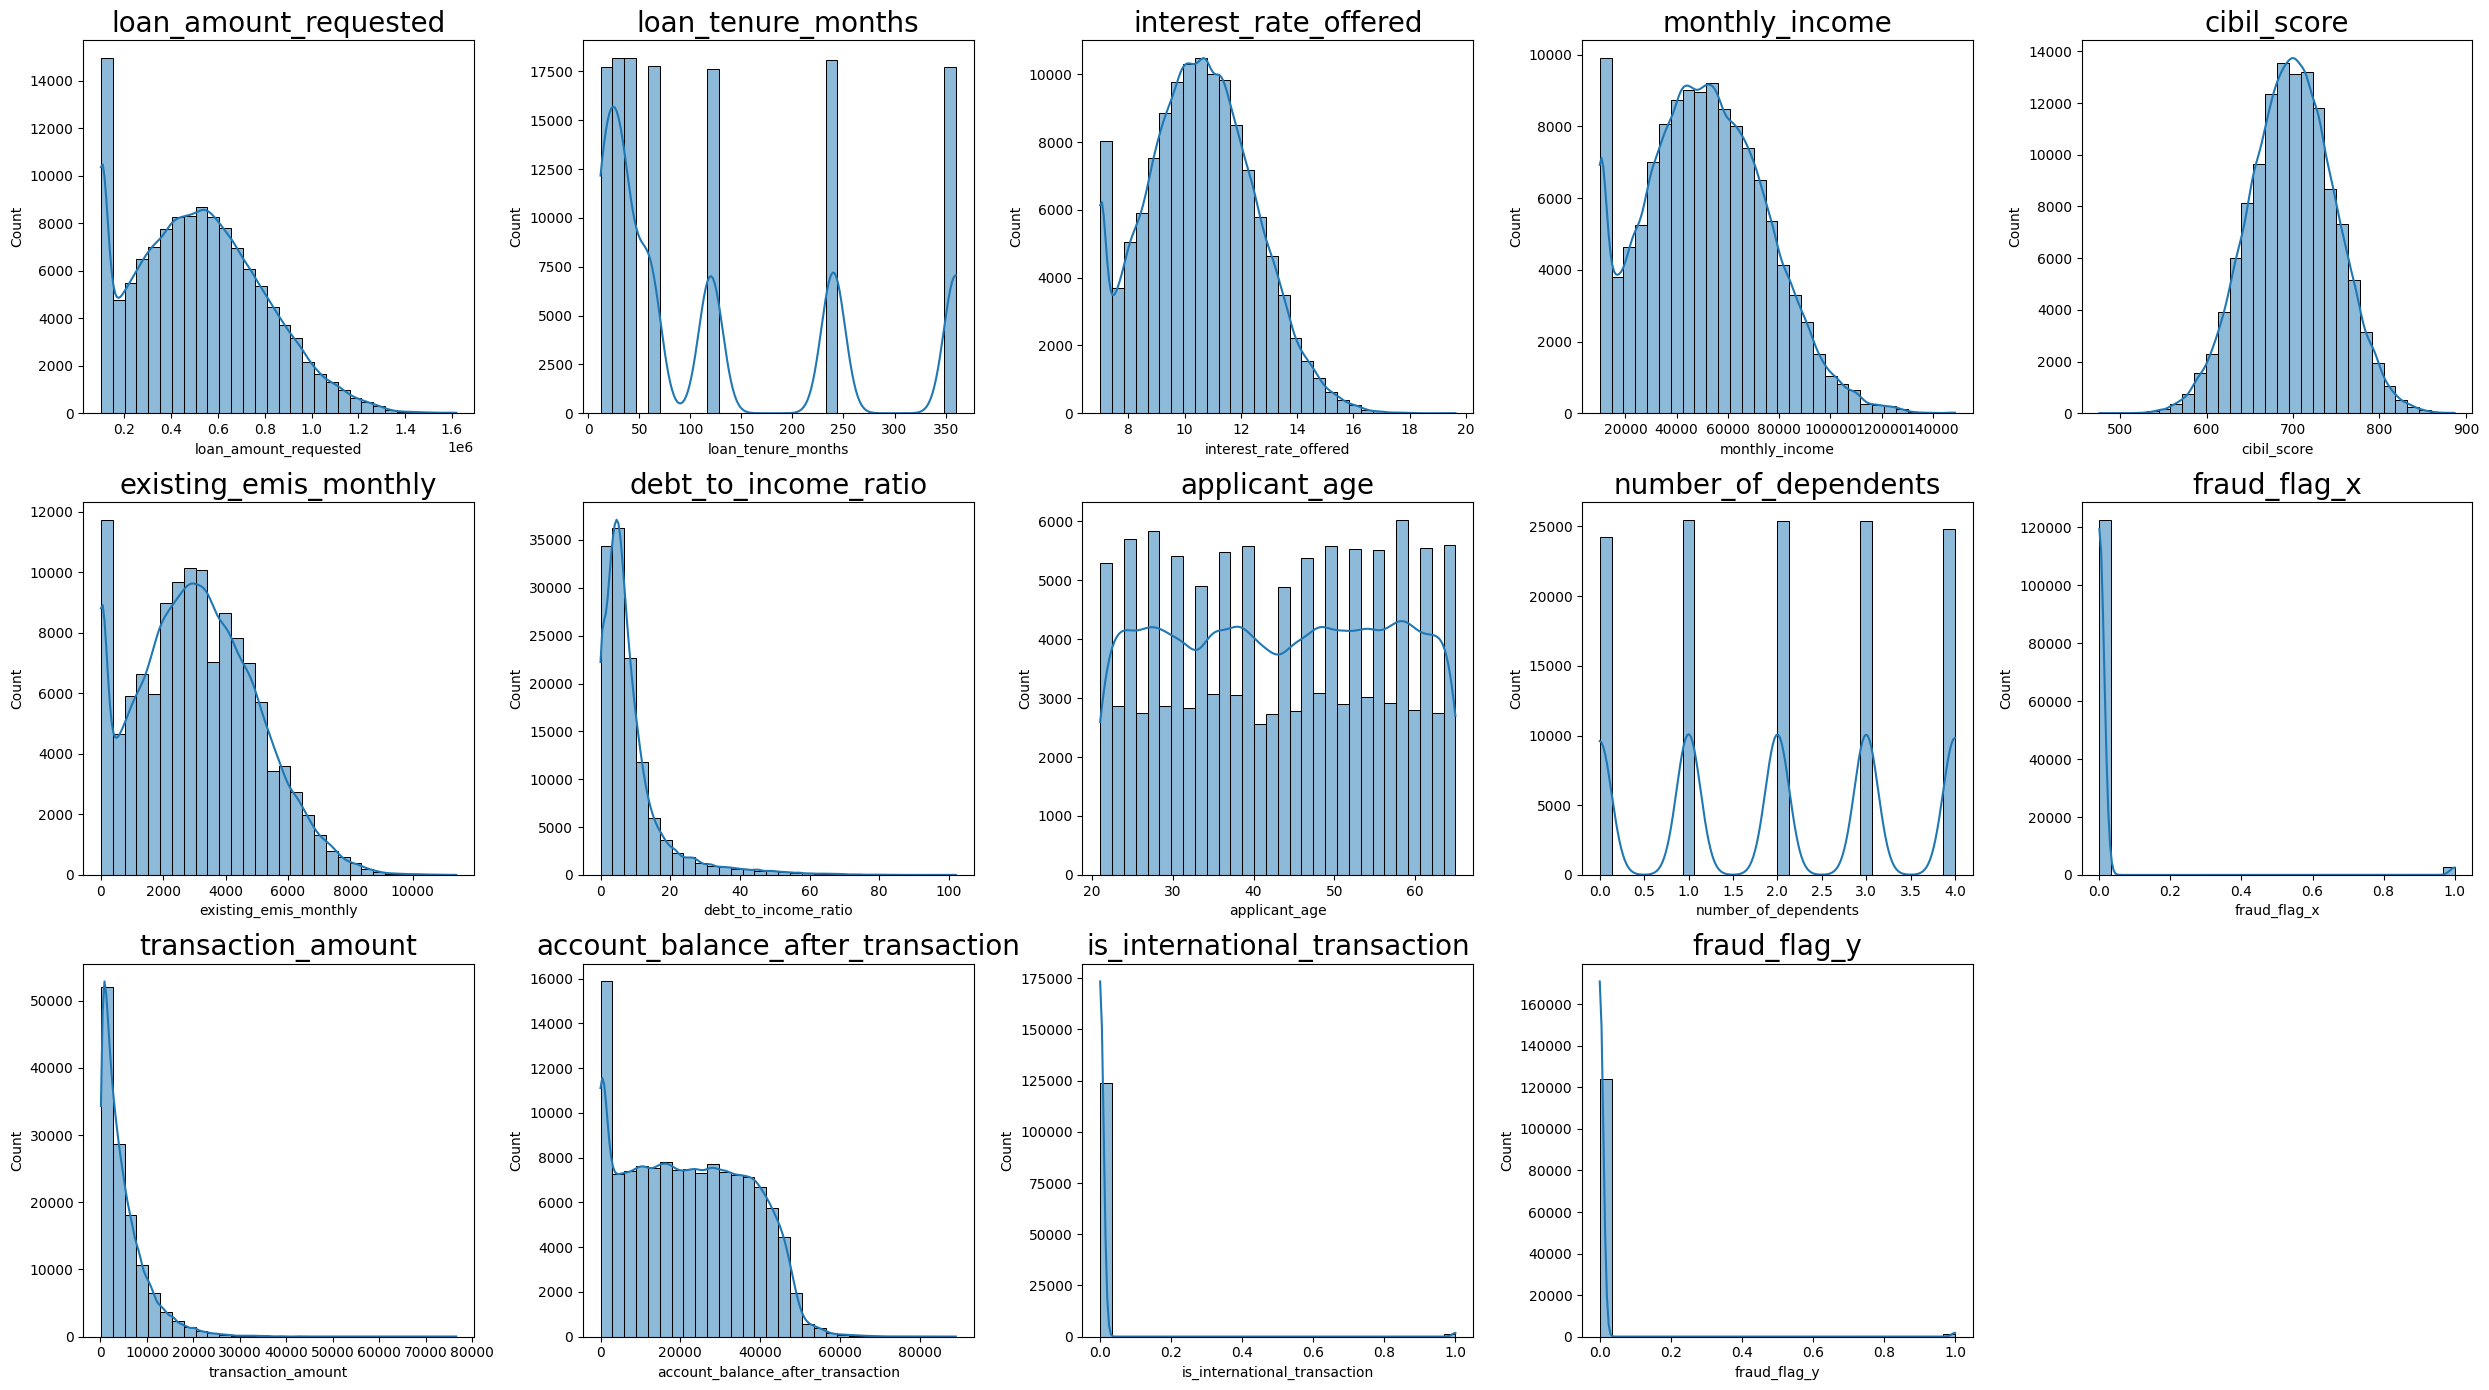

In [103]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(3,5, figsize=(25,2 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = data, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 20)
    
f.delaxes(ax[14]) 
plt.tight_layout()
plt.show()

## **Boxplot**

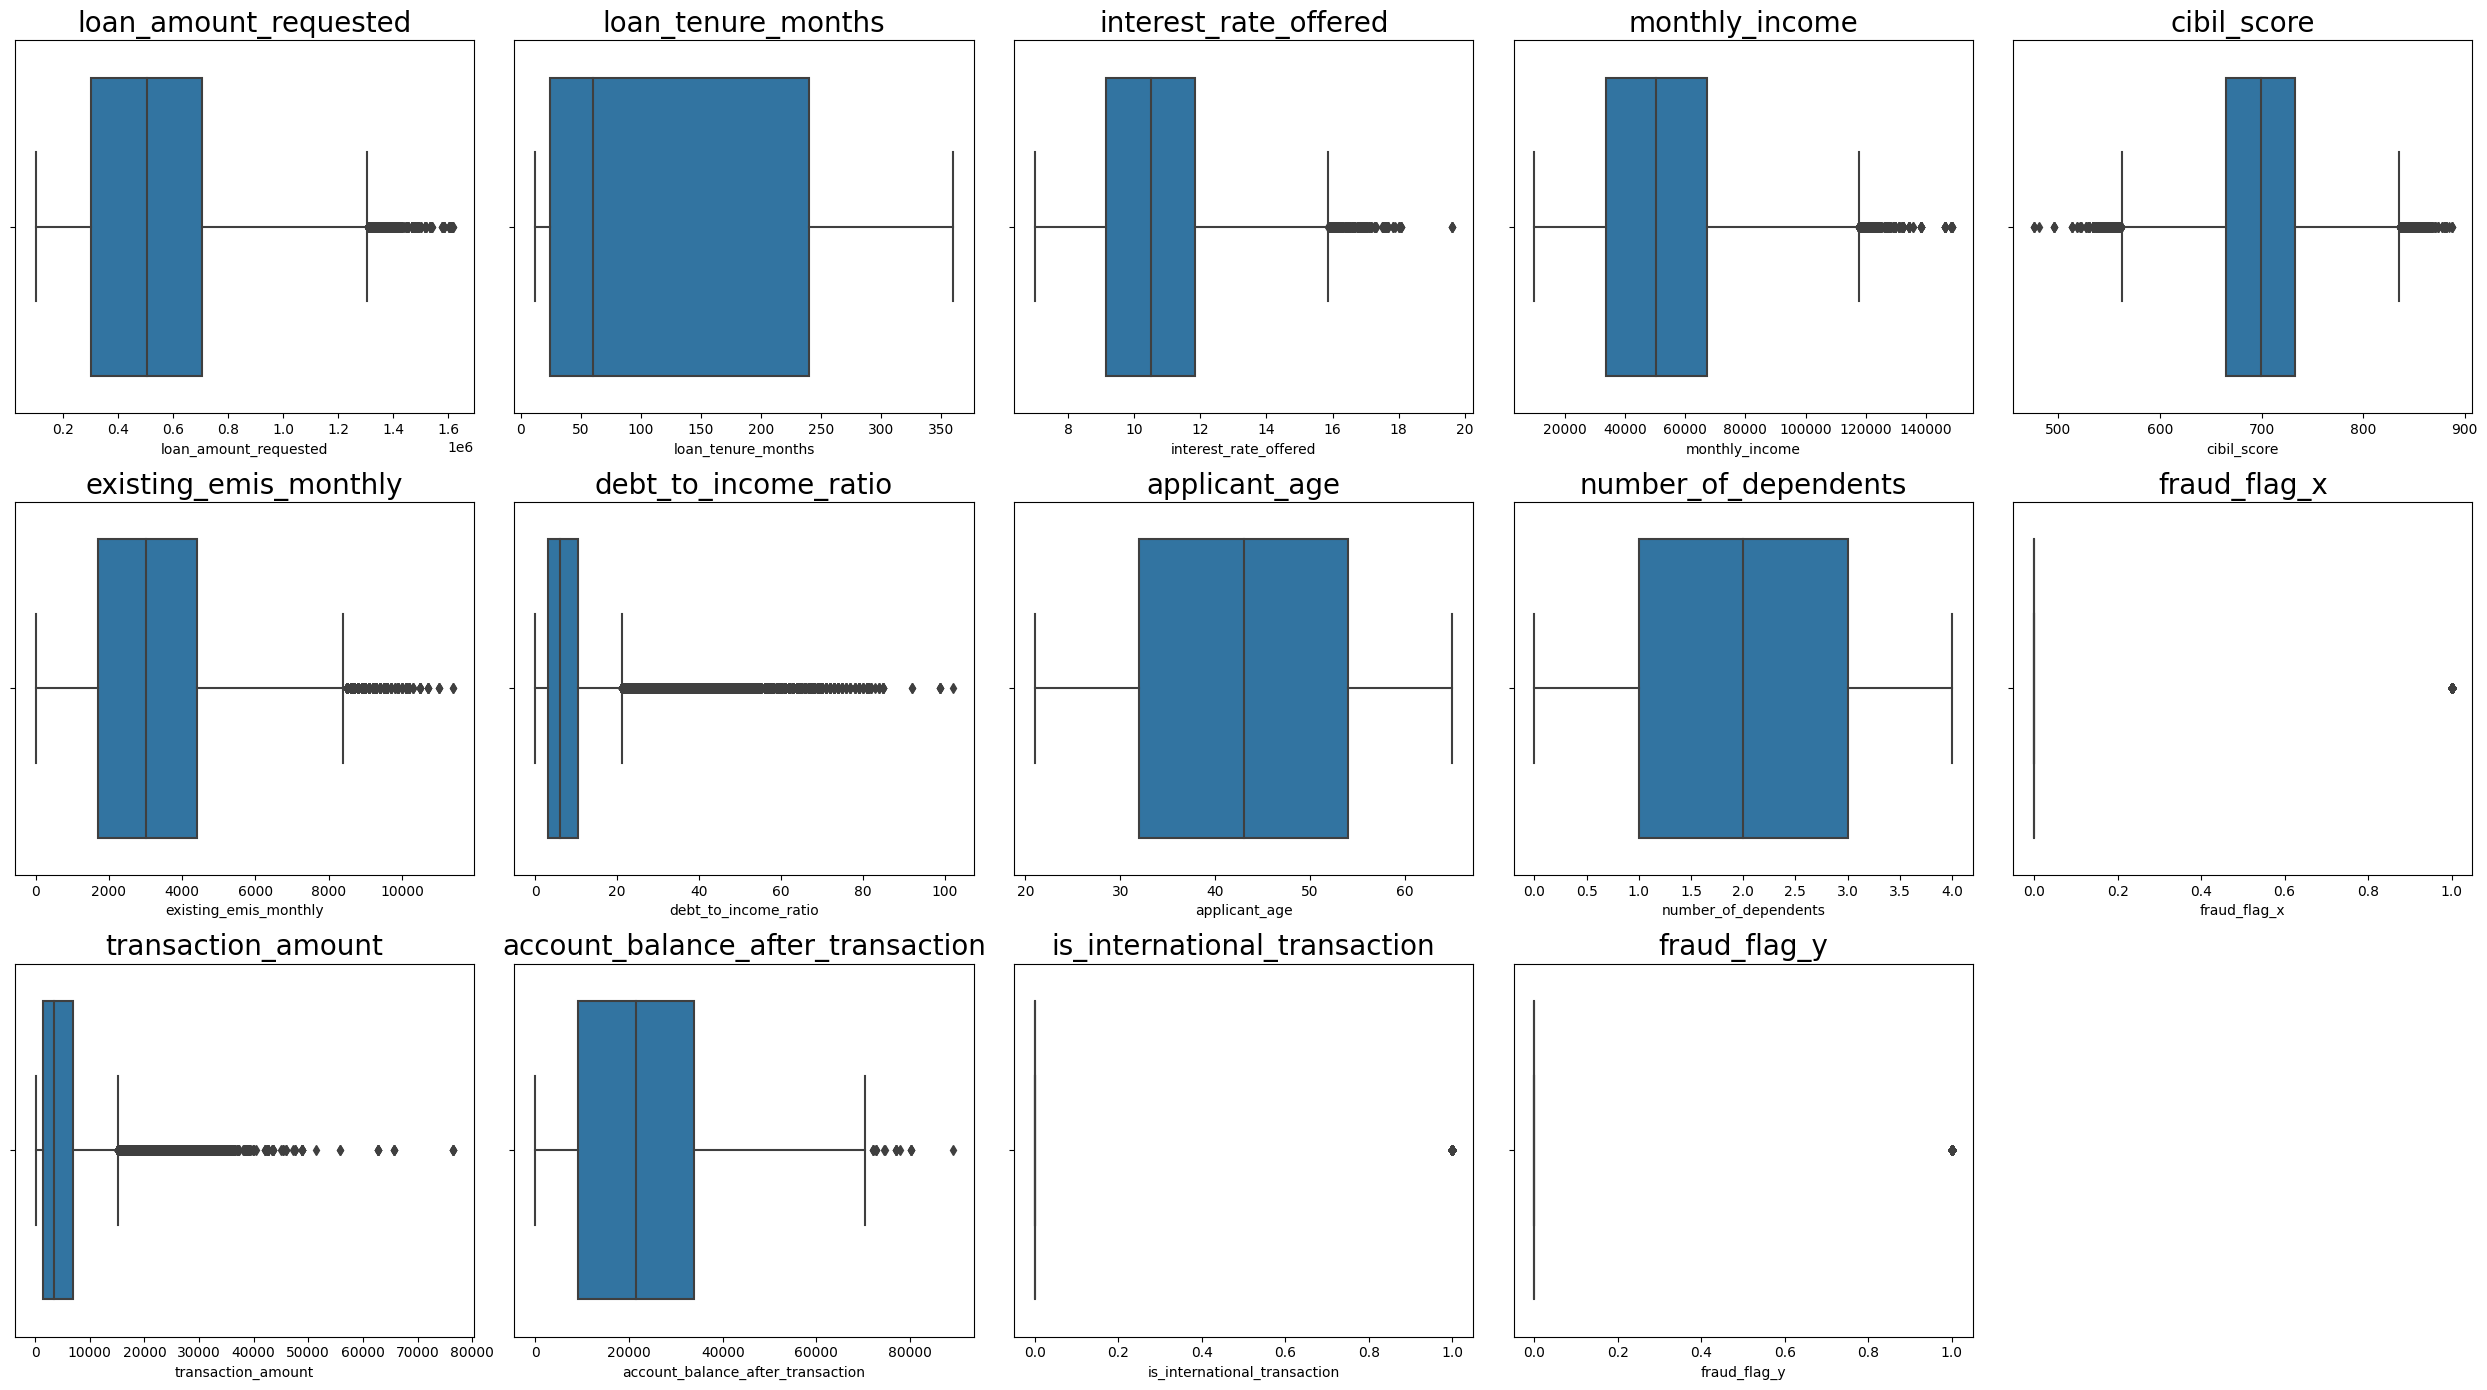

In [104]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(3,5, figsize=(25,2 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data, x= cols , ax= ax[index])
    ax[index].set_title(cols, size=20)
    
f.delaxes(ax[14])     
plt.tight_layout()
plt.show()

## **Correlation**

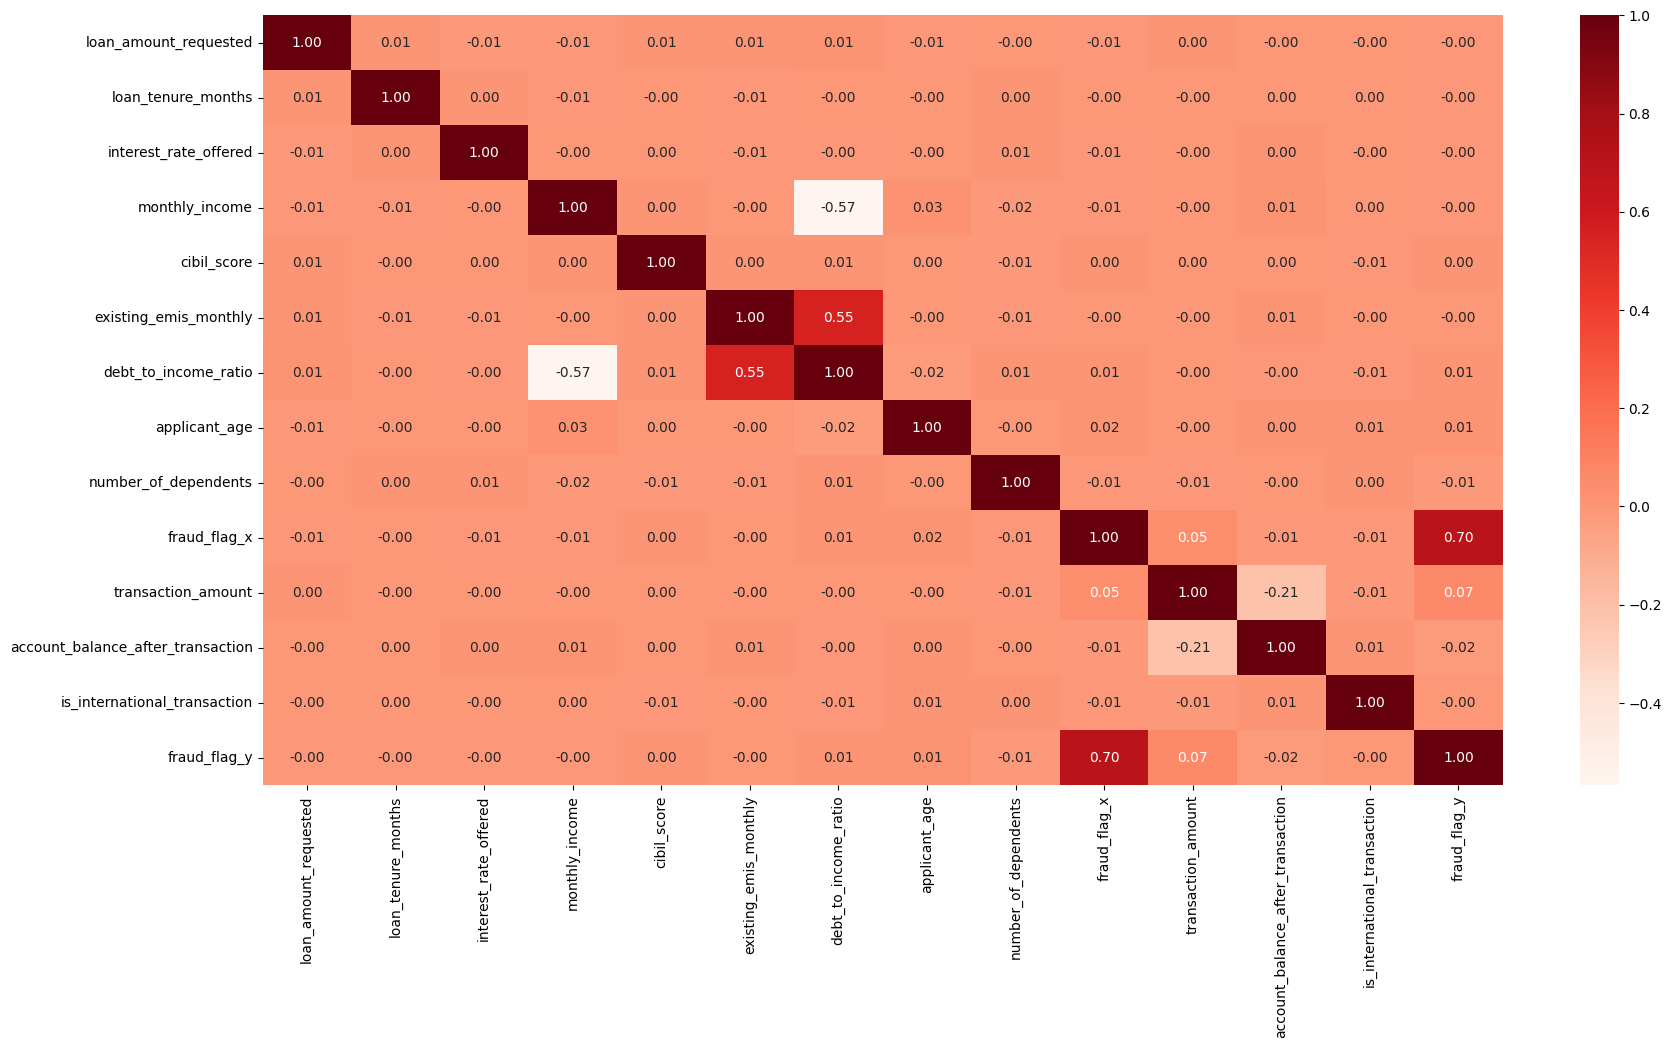

In [105]:
plt.figure(figsize=(20, 10))
sns.heatmap(data[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

## **CountPlot**

In [106]:
cat_cols = ['loan_type','purpose_of_loan','employment_status','property_ownership_status','gender','loan_status',
           'transaction_type', 'merchant_category','device_used','transaction_status']

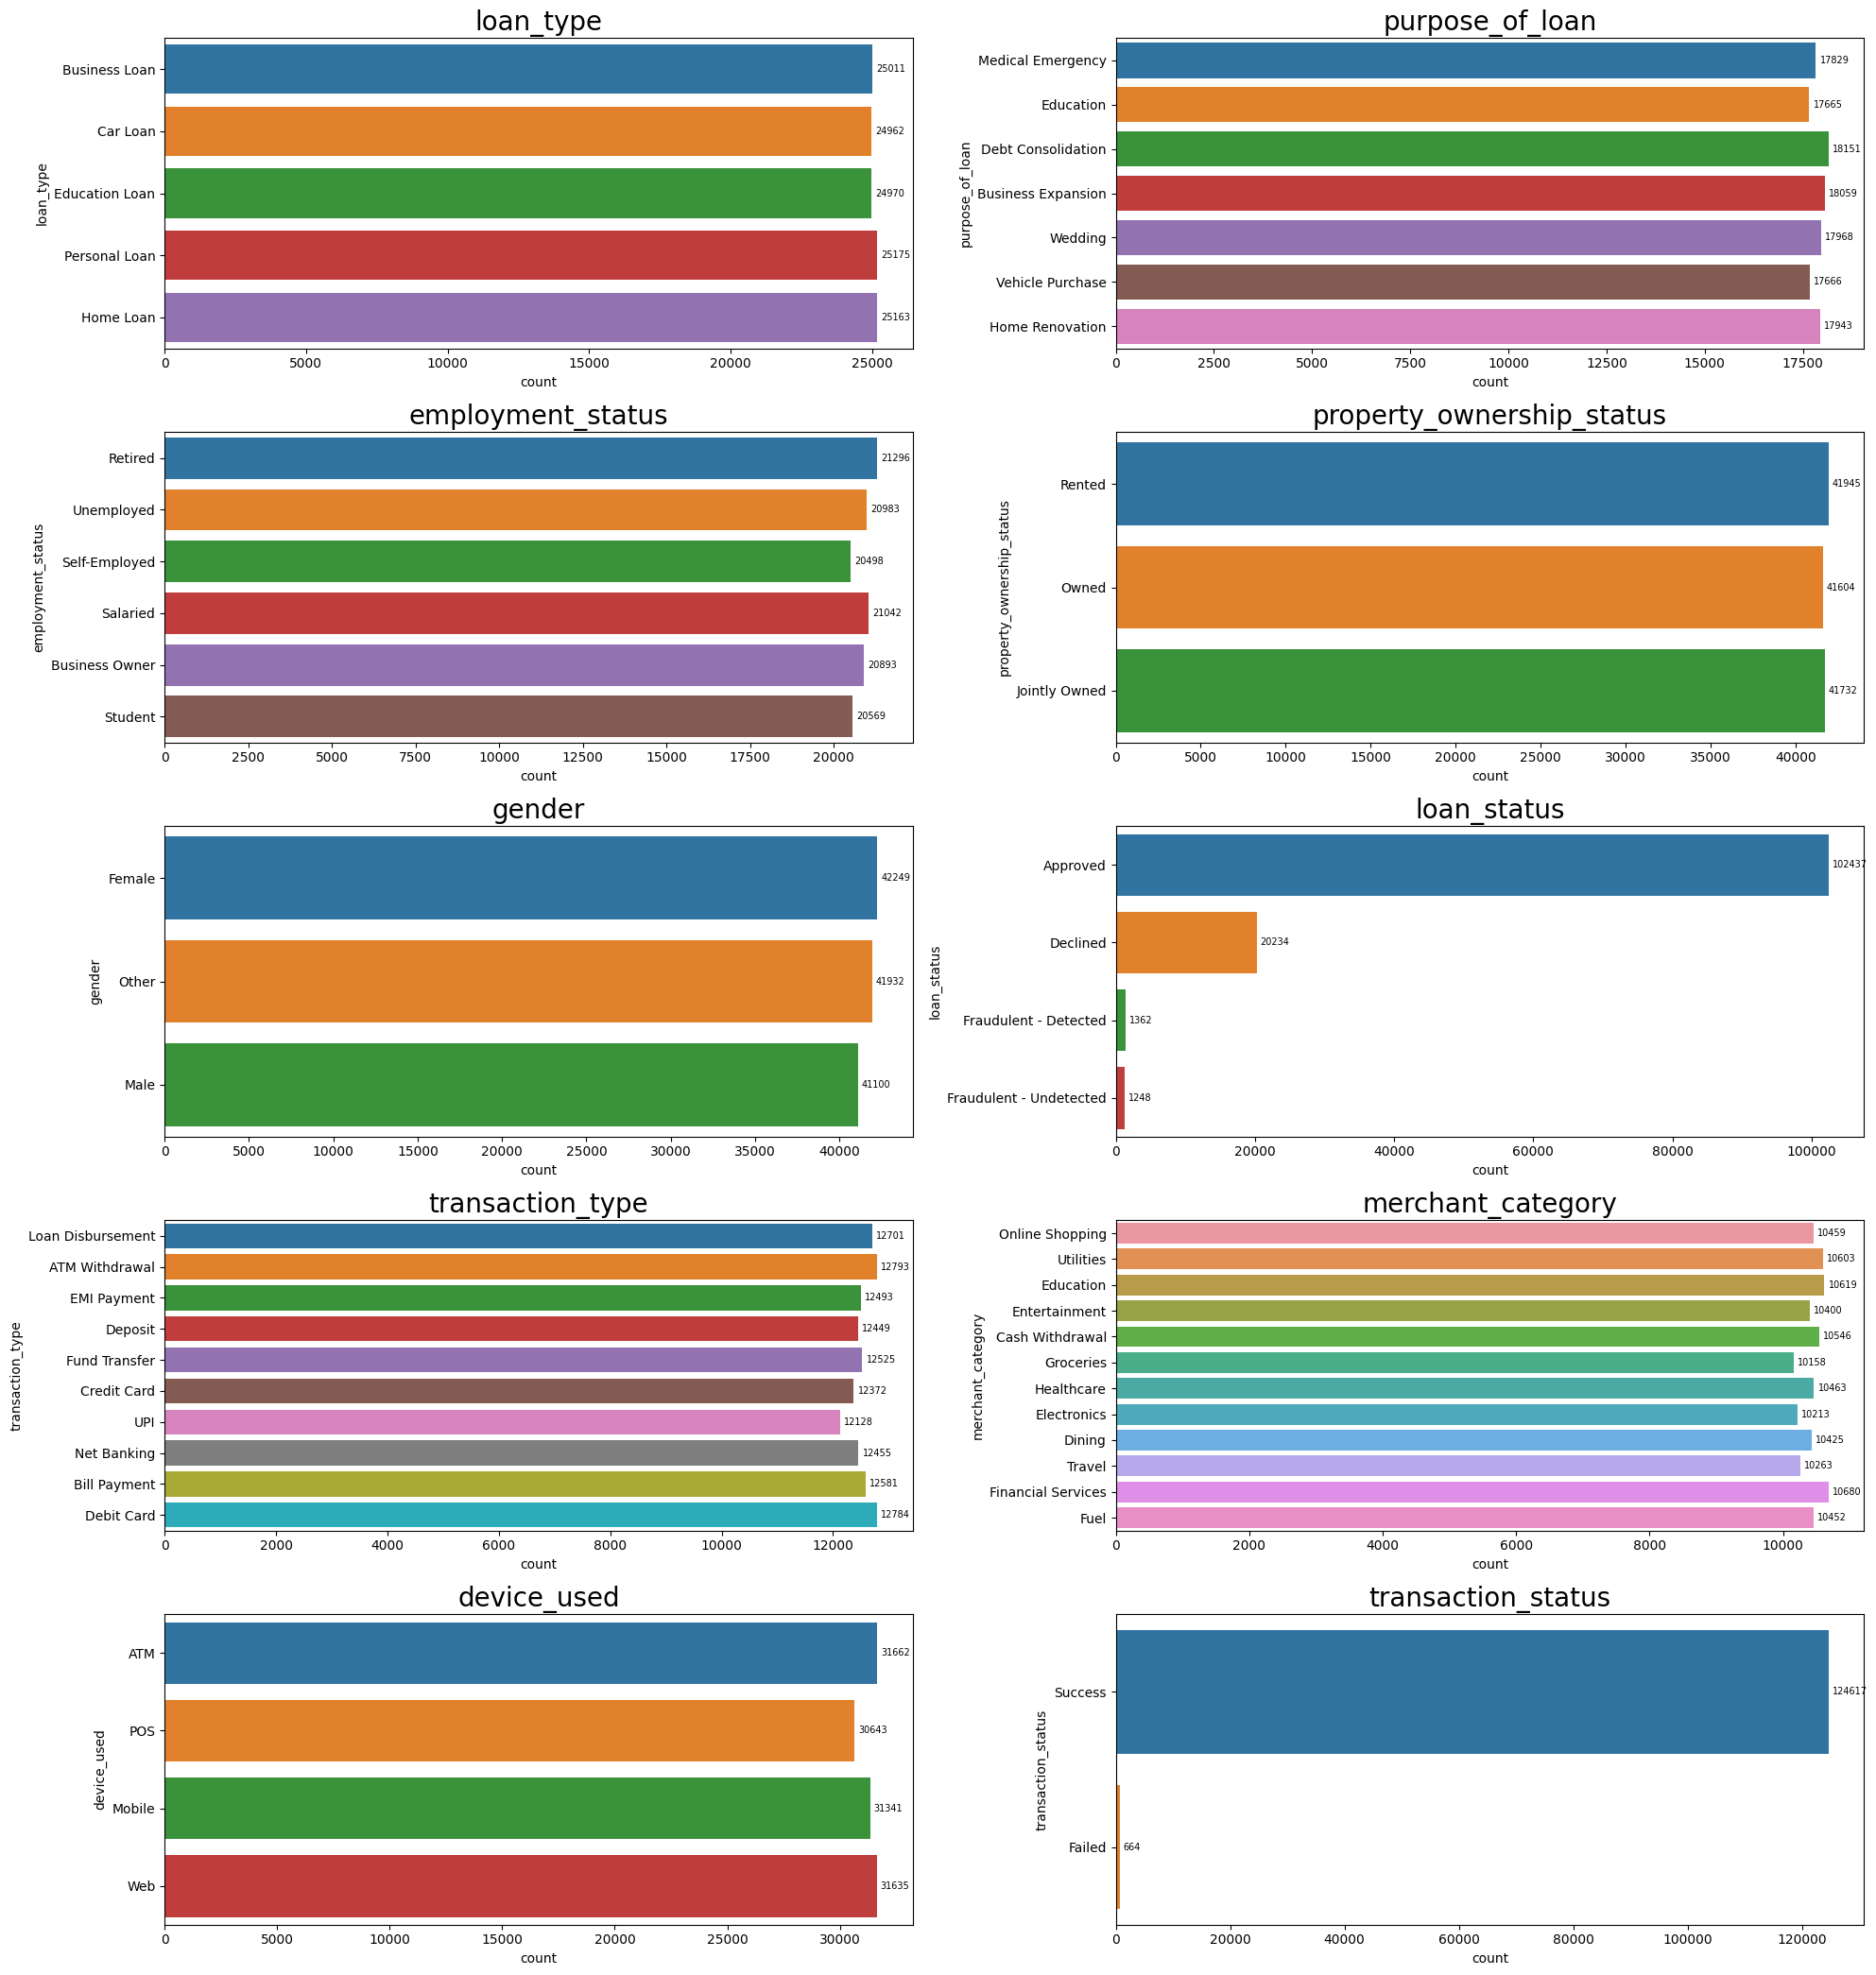

In [107]:
cat_rows = (len(cat_cols) + 1) // 2

f, ax = plt.subplots(5,2, figsize=(20,3 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data, y = cols , ax= ax[index])
    ax[index].set_title(cols, size=20)
    for container in ax[index].containers:
        ax[index].bar_label(container, fontsize=7, padding=3)
        
plt.tight_layout()
plt.show()

# **4. Modeling**

In [108]:
pip install scikit-learn==1.3.2

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [110]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

## **Preprocessing**

In [111]:
data_cols = list(num_cols) + list(cat_cols)

In [112]:
#Label Encoding

label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label} -> {code}")
    print()

Column: loan_type
Business Loan -> 0
Car Loan -> 1
Education Loan -> 2
Home Loan -> 3
Personal Loan -> 4

Column: purpose_of_loan
Business Expansion -> 0
Debt Consolidation -> 1
Education -> 2
Home Renovation -> 3
Medical Emergency -> 4
Vehicle Purchase -> 5
Wedding -> 6

Column: employment_status
Business Owner -> 0
Retired -> 1
Salaried -> 2
Self-Employed -> 3
Student -> 4
Unemployed -> 5

Column: property_ownership_status
Jointly Owned -> 0
Owned -> 1
Rented -> 2

Column: gender
Female -> 0
Male -> 1
Other -> 2

Column: loan_status
Approved -> 0
Declined -> 1
Fraudulent - Detected -> 2
Fraudulent - Undetected -> 3

Column: transaction_type
ATM Withdrawal -> 0
Bill Payment -> 1
Credit Card -> 2
Debit Card -> 3
Deposit -> 4
EMI Payment -> 5
Fund Transfer -> 6
Loan Disbursement -> 7
Net Banking -> 8
UPI -> 9

Column: merchant_category
Cash Withdrawal -> 0
Dining -> 1
Education -> 2
Electronics -> 3
Entertainment -> 4
Financial Services -> 5
Fuel -> 6
Groceries -> 7
Healthcare -> 8
Onli

## **Train Test Split**

In [113]:
x = data[data_cols].drop(columns=['fraud_flag_x','fraud_flag_y'])
y = data['fraud_flag_y']

In [114]:
x_train, x_test, y_train, y_test =train_test_split(x, y , random_state = 42, test_size= 0.2)

In [115]:
rfc = RandomForestClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, lgr,xgb]

names = ["Random Forest", "Logistic Regression","XGB"]

Random Forest accuracy: 0.9964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24812
           1       0.94      0.68      0.79       245

    accuracy                           1.00     25057
   macro avg       0.97      0.84      0.89     25057
weighted avg       1.00      1.00      1.00     25057



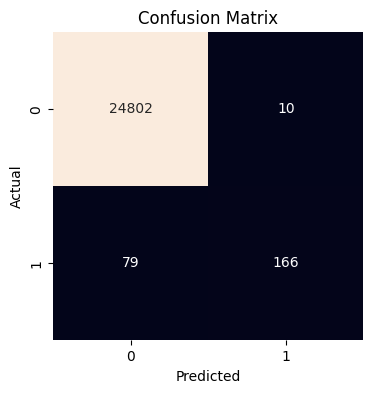

--------------------------------------------------
Logistic Regression accuracy: 0.9903
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24812
           1       1.00      0.00      0.01       245

    accuracy                           0.99     25057
   macro avg       1.00      0.50      0.50     25057
weighted avg       0.99      0.99      0.99     25057



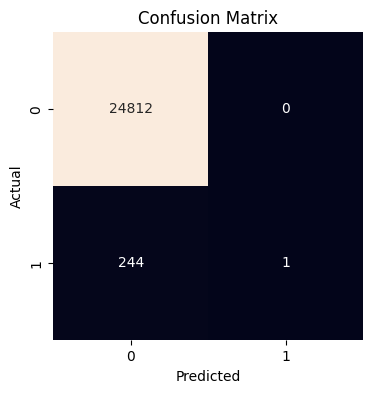

--------------------------------------------------
XGB accuracy: 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24812
           1       0.97      0.89      0.93       245

    accuracy                           1.00     25057
   macro avg       0.98      0.94      0.96     25057
weighted avg       1.00      1.00      1.00     25057



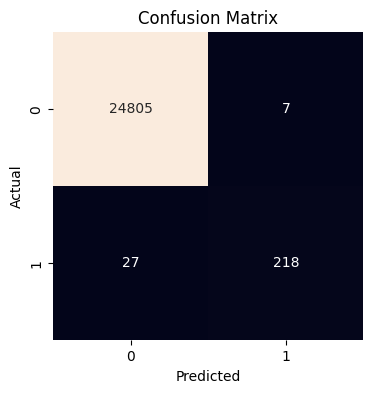

--------------------------------------------------


In [116]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

## **Model Comparison**

In [117]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,Random Forest,99.644810
1,Logistic Regression,99.026220
2,XGB,99.864309


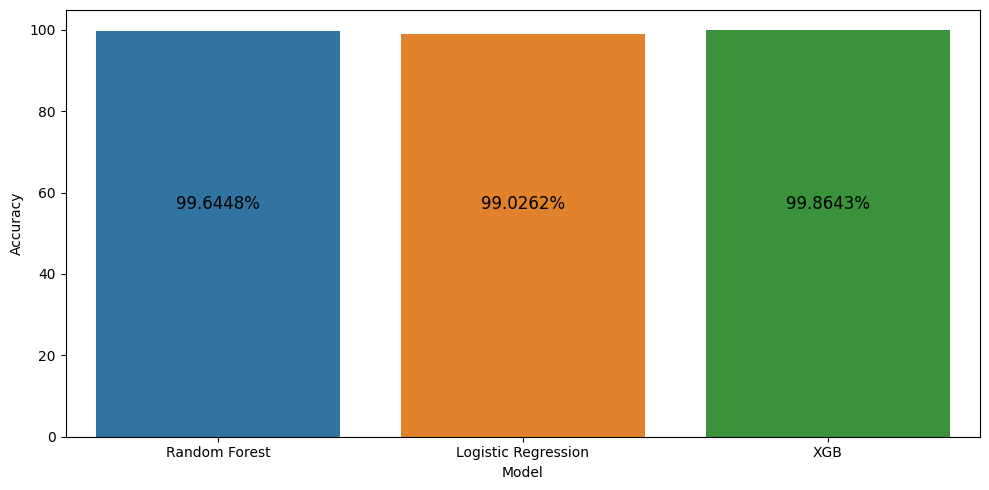

In [121]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')

for index, value in enumerate(ac):
    plt.text(index, value + 55, f"{value*100:.4f}%", ha='center', fontsize=12)
    
plt.tight_layout()
plt.show()

In [122]:
#Select xgb model

sorted_idx = (-xgb.feature_importances_).argsort()
list_of_tuples = list(zip(x.columns[sorted_idx],
                           xgb.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','feature importance'])
feat_importance

,feature,feature importance
0,loan_status,0.501253
1,transaction_status,0.429933
2,monthly_income,0.006006
3,employment_status,0.005439
4,account_balance_after_transaction,0.005264
5,applicant_age,0.005223
6,transaction_amount,0.005130
7,number_of_dependents,0.004372
8,merchant_category,0.004162
9,device_used,0.004096


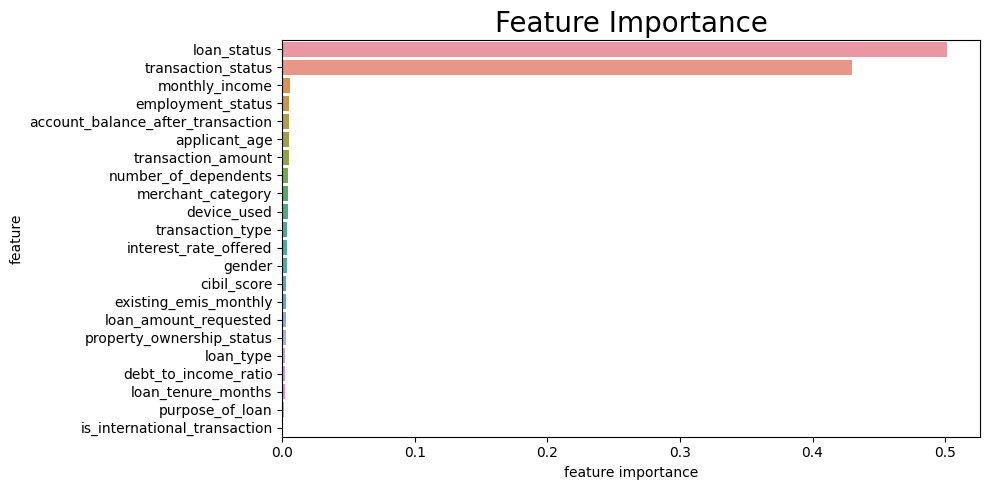

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(feat_importance,y= 'feature',x='feature importance')

plt.title('Feature Importance',fontsize=20)
plt.tight_layout()
plt.show()